# Heart Attack Analysis and Prediction
### 92% Accuracy 
### 0.97 Area Under the Curve

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv('heart.csv', sep=',')

### Renaming columns to something readable

In [50]:
df.columns = ["Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_Blood_Sugar", "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "Old_Peak", "Slope_Of_Peak_Exrcs", "Num_Major_Vessels", "Thalassemia", "Output"]

### Producting report on dataframe to allow initial analysis of features
- 0 Missing elements
- 5 Numeric Features
    - Age
    - Resting_Blood_Pressure
    - Cholesterol
    - Max_Heart_Rate
    - Old_Peak
- 8 Categorical features
- 1 Duplicated row in dataframe

In [51]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Check each feature for type and presence of NULL:

In [52]:
# Check column types
df.dtypes

Age                          int64
Sex                          int64
Chest_Pain_Type              int64
Resting_Blood_Pressure       int64
Cholesterol                  int64
Fasting_Blood_Sugar          int64
Resting_ECG                  int64
Max_Heart_Rate               int64
Exercise_Induced_Angina      int64
Old_Peak                   float64
Slope_Of_Peak_Exrcs          int64
Num_Major_Vessels            int64
Thalassemia                  int64
Output                       int64
dtype: object

### Histograms of features before pre-processing
- allows for detection of outliers

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Chest_Pain_Type'}>,
        <Axes: title={'center': 'Resting_Blood_Pressure'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'Fasting_Blood_Sugar'}>,
        <Axes: title={'center': 'Resting_ECG'}>,
        <Axes: title={'center': 'Max_Heart_Rate'}>,
        <Axes: title={'center': 'Exercise_Induced_Angina'}>,
        <Axes: title={'center': 'Old_Peak'}>],
       [<Axes: title={'center': 'Slope_Of_Peak_Exrcs'}>,
        <Axes: title={'center': 'Num_Major_Vessels'}>,
        <Axes: title={'center': 'Thalassemia'}>,
        <Axes: title={'center': 'Output'}>, <Axes: >]], dtype=object)

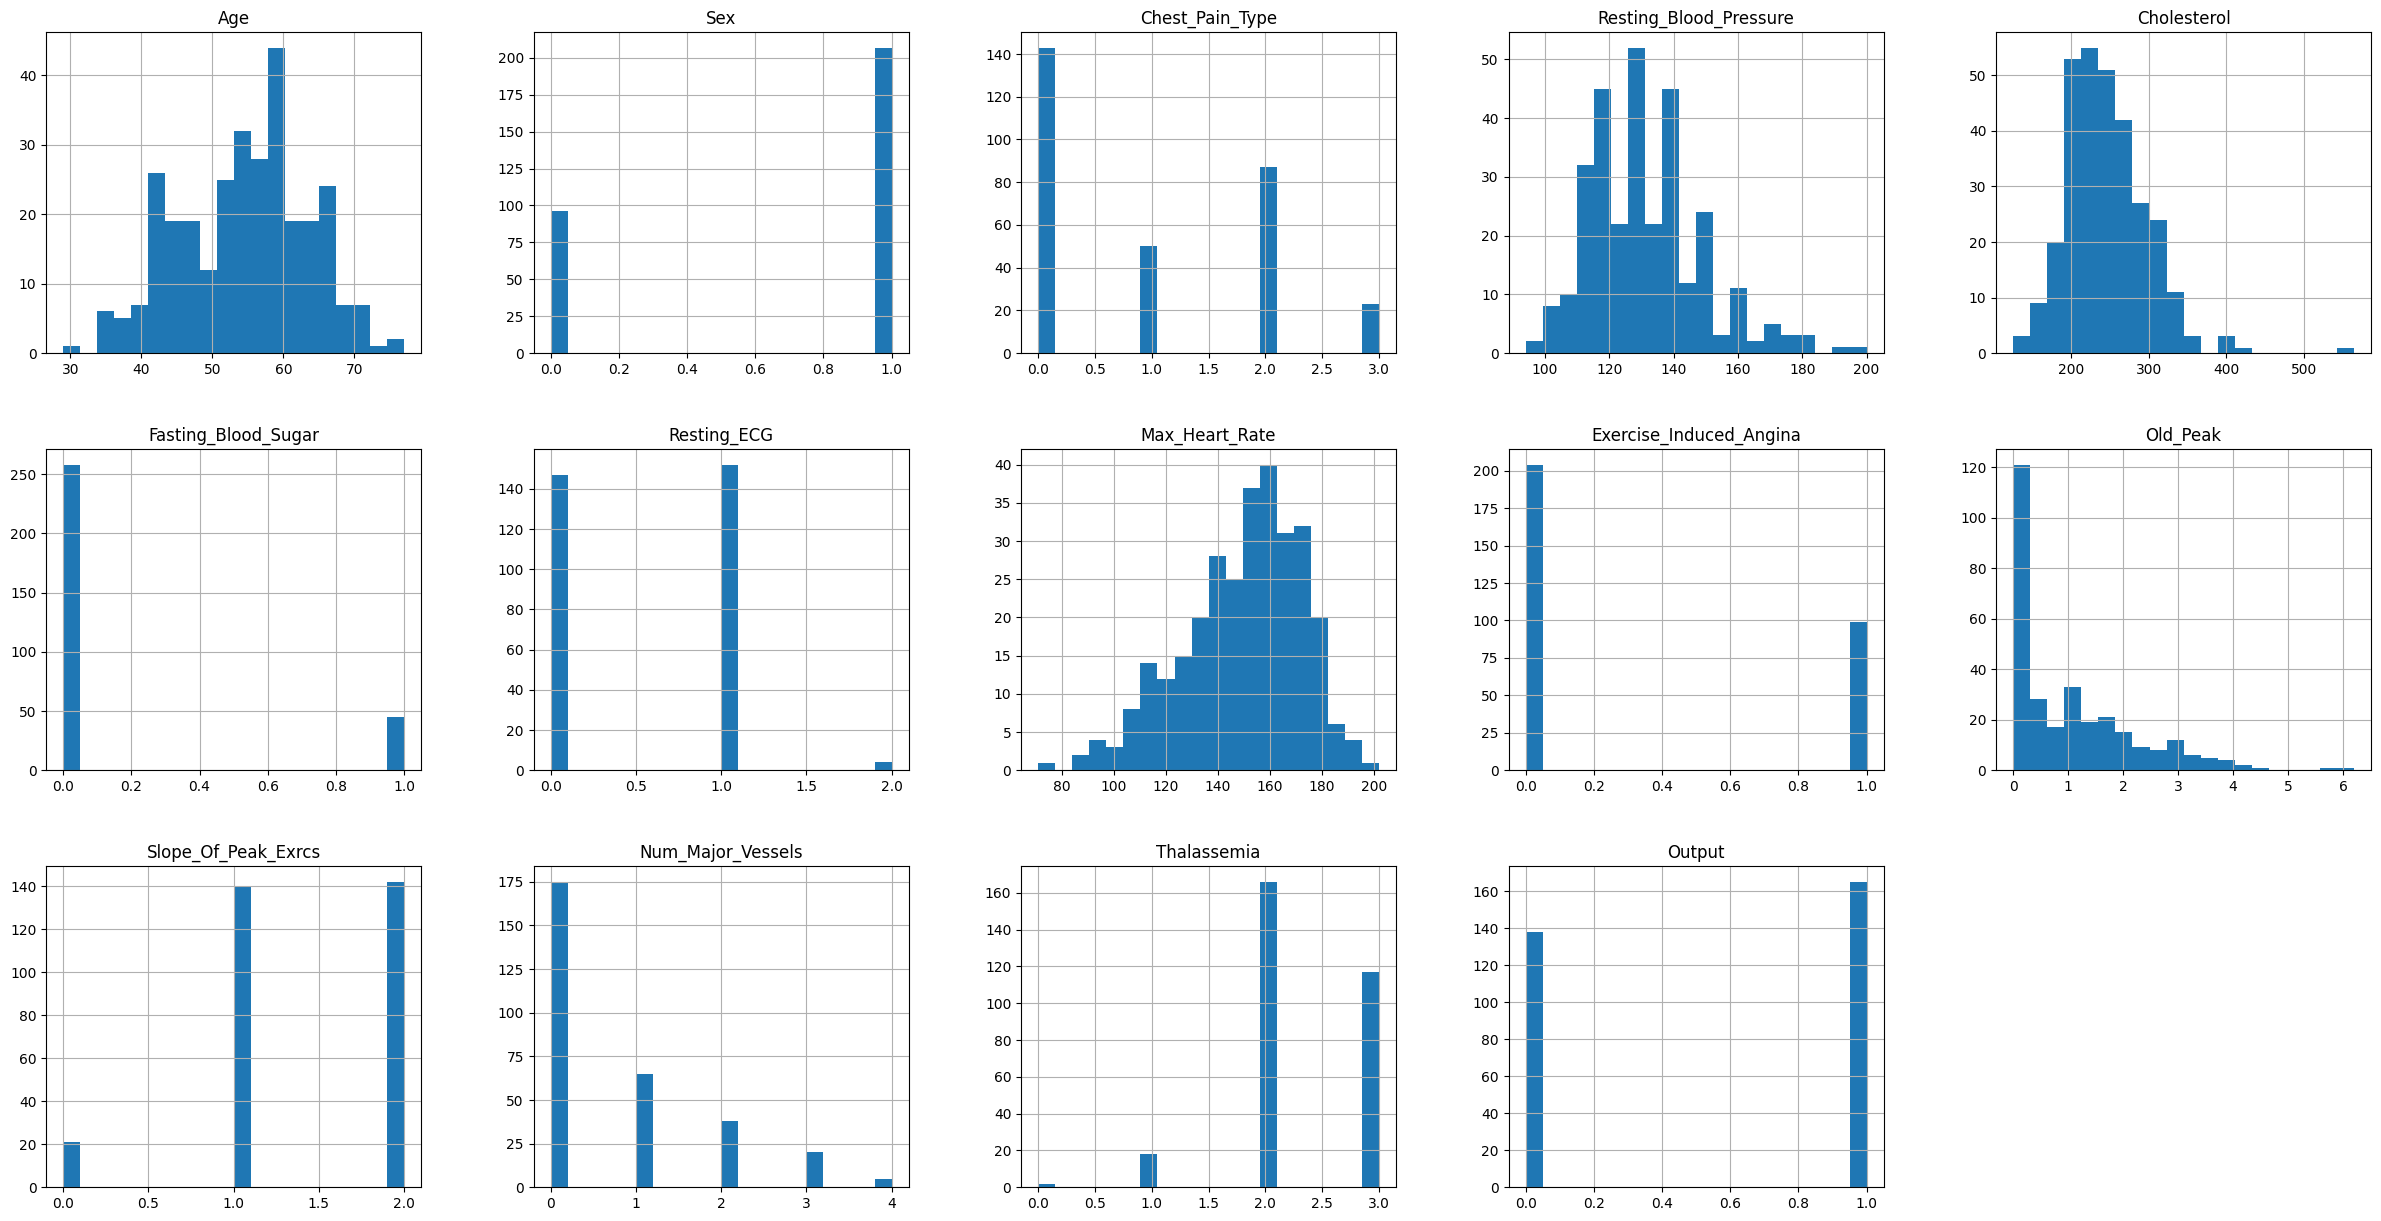

In [53]:
df.hist(figsize=(30,15), bins = 20, layout=(3,5))

### Check for bad data:
- Only bad data is one duplicate row

In [54]:
# check for zeros
df[df == 0].count() 

Age                          0
Sex                         96
Chest_Pain_Type            143
Resting_Blood_Pressure       0
Cholesterol                  0
Fasting_Blood_Sugar        258
Resting_ECG                147
Max_Heart_Rate               0
Exercise_Induced_Angina    204
Old_Peak                    99
Slope_Of_Peak_Exrcs         21
Num_Major_Vessels          175
Thalassemia                  2
Output                     138
dtype: int64

In [55]:
# check for negatives
df[df<0].count()

Age                        0
Sex                        0
Chest_Pain_Type            0
Resting_Blood_Pressure     0
Cholesterol                0
Fasting_Blood_Sugar        0
Resting_ECG                0
Max_Heart_Rate             0
Exercise_Induced_Angina    0
Old_Peak                   0
Slope_Of_Peak_Exrcs        0
Num_Major_Vessels          0
Thalassemia                0
Output                     0
dtype: int64

In [56]:
# Check for duplicated rows:
len(df[df.duplicated()])

1

In [57]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)

### Display correlation matrix of features
- No multi-Collinearity present (correlations aboe 0.8)

In [58]:
corr_matrix=df.corr()#.round(3)
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope_Of_Peak_Exrcs,Num_Major_Vessels,Thalassemia,Output
Age,1.00,-0.09,-0.06,0.28,0.21,0.12,-0.11,-0.40,0.09,0.21,-0.16,0.30,0.07,-0.22
Sex,-0.09,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.05,0.14,0.10,-0.03,0.11,0.21,-0.28
Chest_Pain_Type,-0.06,-0.05,1.00,0.05,-0.07,0.10,0.04,0.29,-0.39,-0.15,0.12,-0.20,-0.16,0.43
Resting_Blood_Pressure,0.28,-0.06,0.05,1.00,0.13,0.18,-0.12,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.15
Cholesterol,0.21,-0.20,-0.07,0.13,1.00,0.01,-0.15,-0.01,0.06,0.05,0.00,0.09,0.10,-0.08
Fasting_Blood_Sugar,0.12,0.05,0.10,0.18,0.01,1.00,-0.08,-0.01,0.02,0.00,-0.06,0.14,-0.03,-0.03
Resting_ECG,-0.11,-0.06,0.04,-0.12,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.08,-0.01,0.13
Max_Heart_Rate,-0.40,-0.05,0.29,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.38,-0.23,-0.09,0.42
Exercise_Induced_Angina,0.09,0.14,-0.39,0.07,0.06,0.02,-0.07,-0.38,1.00,0.29,-0.26,0.13,0.21,-0.44
Old_Peak,0.21,0.10,-0.15,0.19,0.05,0.00,-0.06,-0.34,0.29,1.00,-0.58,0.24,0.21,-0.43


In [59]:
correlation_with_output = corr_matrix['Output'].sort_values(ascending=False)
print(correlation_with_output)

Output                     1.000000
Chest_Pain_Type            0.432080
Max_Heart_Rate             0.419955
Slope_Of_Peak_Exrcs        0.343940
Resting_ECG                0.134874
Fasting_Blood_Sugar       -0.026826
Cholesterol               -0.081437
Resting_Blood_Pressure    -0.146269
Age                       -0.221476
Sex                       -0.283609
Thalassemia               -0.343101
Num_Major_Vessels         -0.408992
Old_Peak                  -0.429146
Exercise_Induced_Angina   -0.435601
Name: Output, dtype: float64


### Impute missing values:

In [60]:
# no missing data for this dataset

### Set X and Y

In [66]:
Y = df.loc[:, df.columns == 'Output']
X = df.loc[:, df.columns != 'Output']

### One Hot Encoding Categorical columns


In [62]:

# cols_to_encode = [
#                     "Sex",
#                     "Chest_Pain_Type",
#                     "Fasting_Blood_Sugar",
#                     "Resting_ECG",
#                     "Exercise_Induced_Angina",
#                     "Slope_Of_Peak_Exrcs",
#                     "Num_Major_Vessels",
#                     "Thalassemia"
#                 ]
# dummies = pd.get_dummies(X, columns = cols_to_encode)
# X = X.drop(cols_to_encode, axis=1)
# X = pd.concat([X, dummies], axis=1)


### Check skew and kurtosis of columns
- Age
- Resting_Blood_Pressure
- Cholesterol
    - Too right (positively) skewed
- Max_Heart_Rate
- Old_Peak
    - Too right (positively) skewed

In [63]:
# check skew of data
X.skew()

Age                       -0.203743
Sex                       -0.786120
Chest_Pain_Type            0.493022
Resting_Blood_Pressure     0.716541
Cholesterol                1.147332
Fasting_Blood_Sugar        1.981201
Resting_ECG                0.169467
Max_Heart_Rate            -0.532671
Exercise_Induced_Angina    0.737281
Old_Peak                   1.266173
Slope_Of_Peak_Exrcs       -0.503247
Num_Major_Vessels          1.295738
Thalassemia               -0.481232
dtype: float64

### Comparing different transformations to fix skew

c:\Users\toyal\anaconda3\envs\DataScienceProjects\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (500) is greater than the total number of samples (302). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\toyal\anaconda3\envs\DataScienceProjects\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (500) is greater than the total number of samples (302). n_quantiles is set to n_samples.
  warnings.warn(


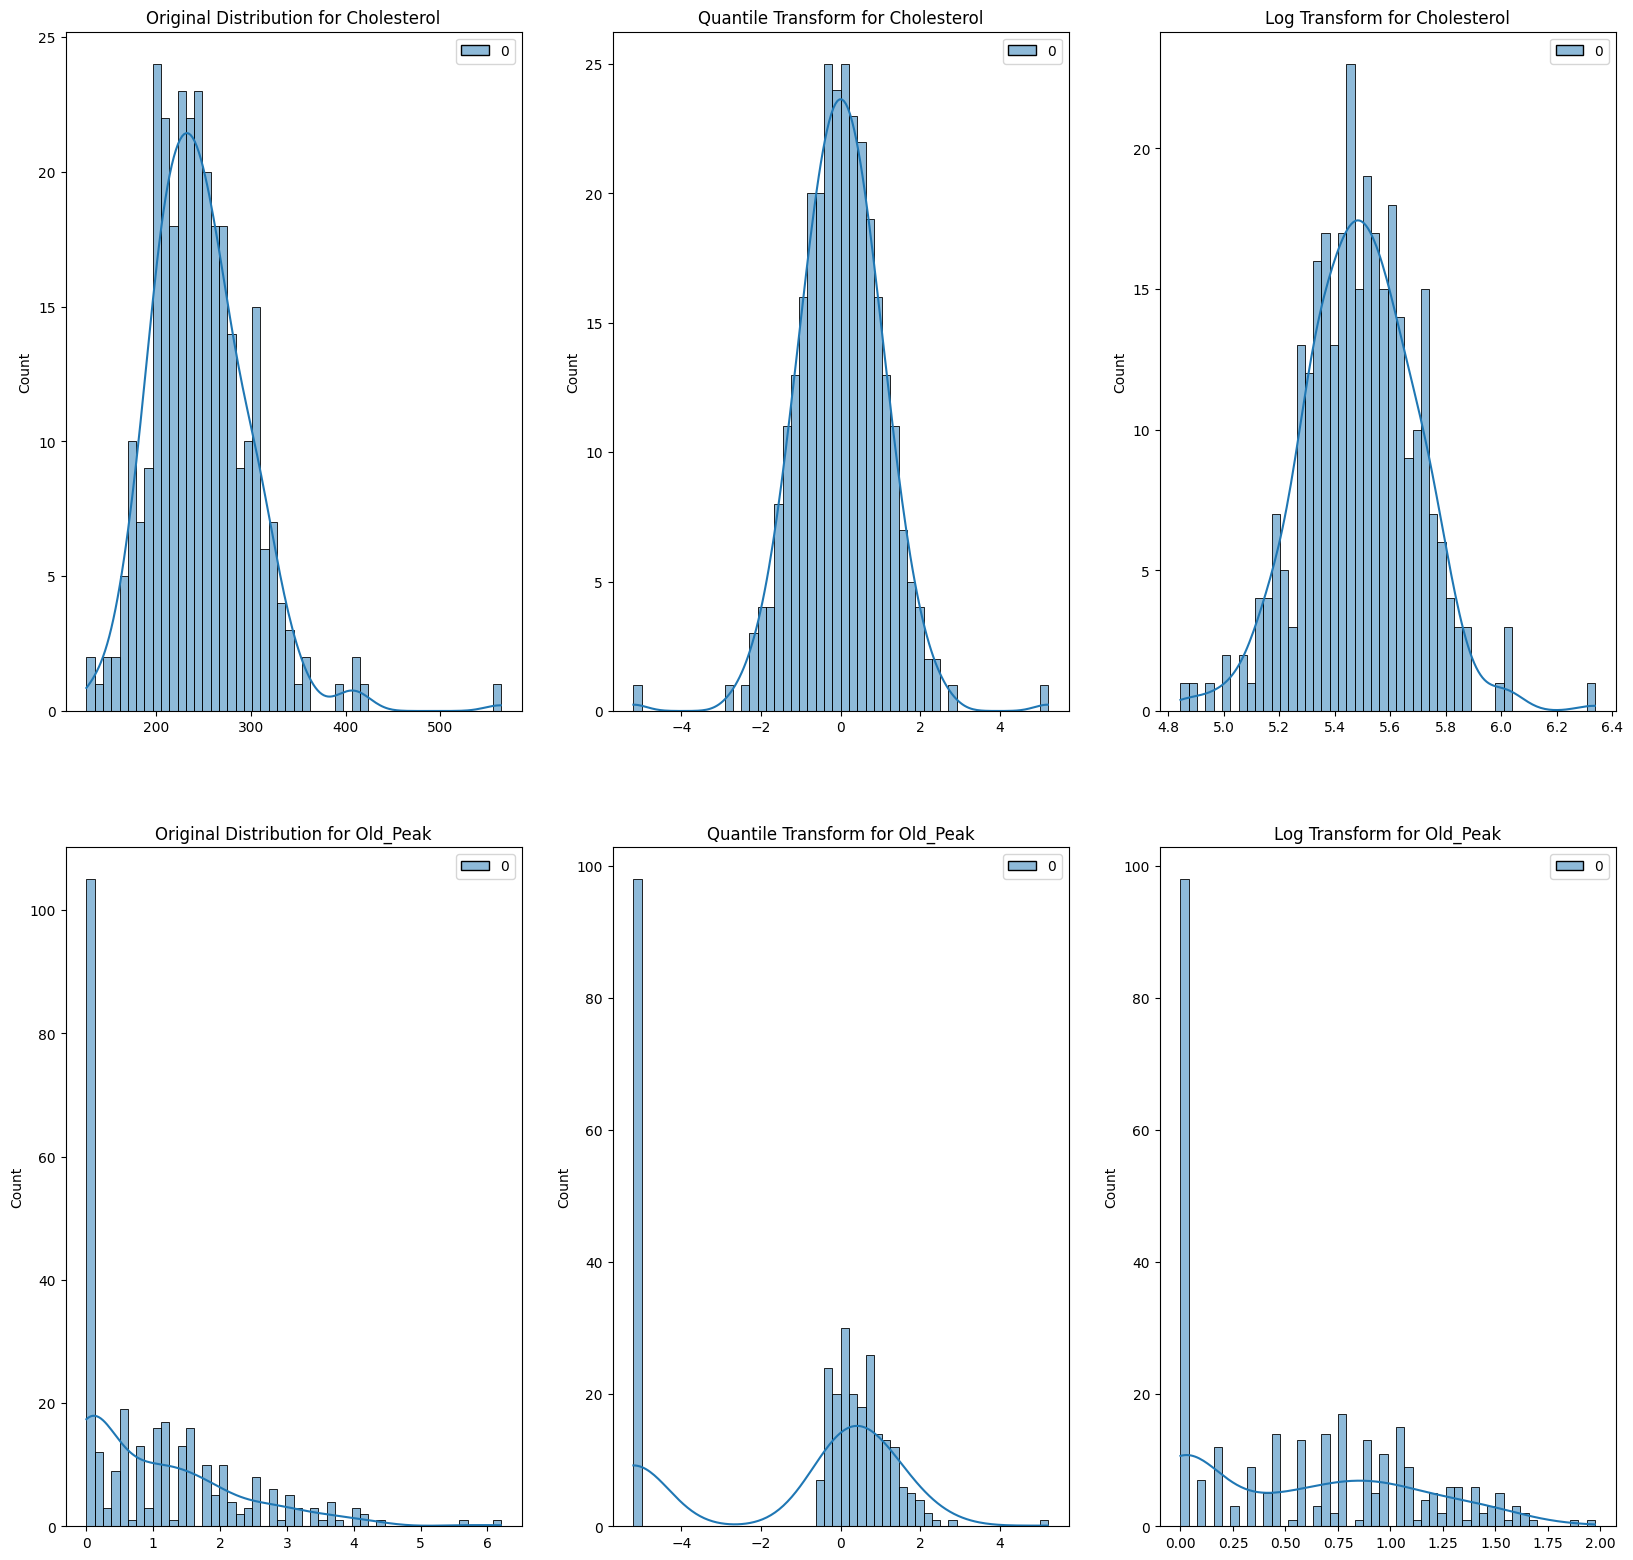

In [64]:
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer
cols1 = ["Cholesterol", "Old_Peak"]

def test_transformers(columns):
    #pt = log_transform()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(X[i]).reshape(-1, 1)
        y = np.log(array + 1)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Log Transform for {i}")
        j += 3

test_transformers(cols1)

### Adjusting skew of Old_Peak and Cholesterol

In [67]:

qt = QuantileTransformer(n_quantiles=302, output_distribution='normal')
X.loc[:,'Cholesterol'] = qt.fit_transform(np.array(X['Cholesterol']).reshape(-1, 1))
X.loc[:,'Old_Peak'] = qt.fit_transform(np.array(X['Old_Peak']).reshape(-1, 1))

In [68]:
# check skew of data
X.skew()

Age                       -0.203743
Sex                       -0.786120
Chest_Pain_Type            0.493022
Resting_Blood_Pressure     0.716541
Cholesterol                0.000434
Fasting_Blood_Sugar        1.981201
Resting_ECG                0.169467
Max_Heart_Rate            -0.532671
Exercise_Induced_Angina    0.737281
Old_Peak                  -0.574507
Slope_Of_Peak_Exrcs       -0.503247
Num_Major_Vessels          1.295738
Thalassemia               -0.481232
dtype: float64

In [70]:
X.kurtosis()

Age                       -0.527512
Sex                       -1.391273
Chest_Pain_Type           -1.183729
Resting_Blood_Pressure     0.922996
Cholesterol                2.796835
Fasting_Blood_Sugar        1.937947
Resting_ECG               -1.359464
Max_Heart_Rate            -0.062186
Exercise_Induced_Angina   -1.466170
Old_Peak                  -1.362282
Slope_Of_Peak_Exrcs       -0.629935
Num_Major_Vessels          0.781003
Thalassemia                0.295855
dtype: float64

### Standardizing data

In [71]:
columns = X.columns

#data preprocessing
numeric_columns = ['Age', 'Resting_Blood_Pressure', 'Cholesterol', 'Max_Heart_Rate', 'Old_Peak']

# Create a StandardScaler instance
scaler = StandardScaler()
# features = X_train[col_names]
# scaler = StandardScaler().fit(features.values)
# features = scaler.transform(features.values)

# Fit the scaler on the data and transform the selected columns
X.loc[:,numeric_columns] = scaler.fit_transform(X[numeric_columns])
X.columns = columns

### Checking for outliers:

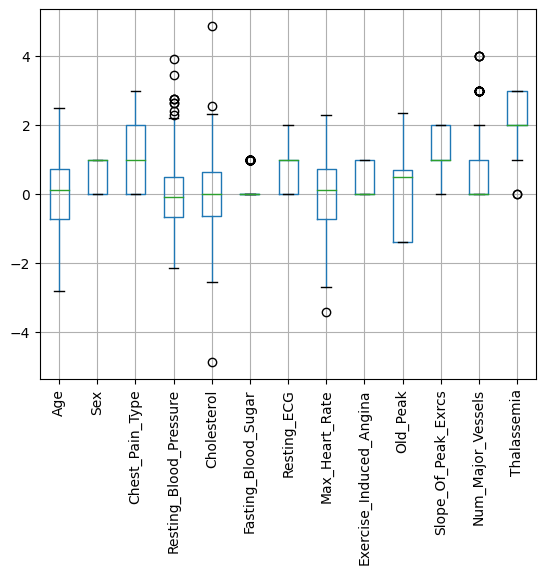

In [72]:
boxplot = X.boxplot() 
plt.xticks(rotation=90);

### Winsorizing outliers

In [22]:
# def winsorize_series(X):
#     return winsorize(X, limits=[0.01,0.02])

# X_win = X.apply(winsorize_series, axis=0)
# boxplot = X_win.boxplot() 
# plt.xticks(rotation=90);


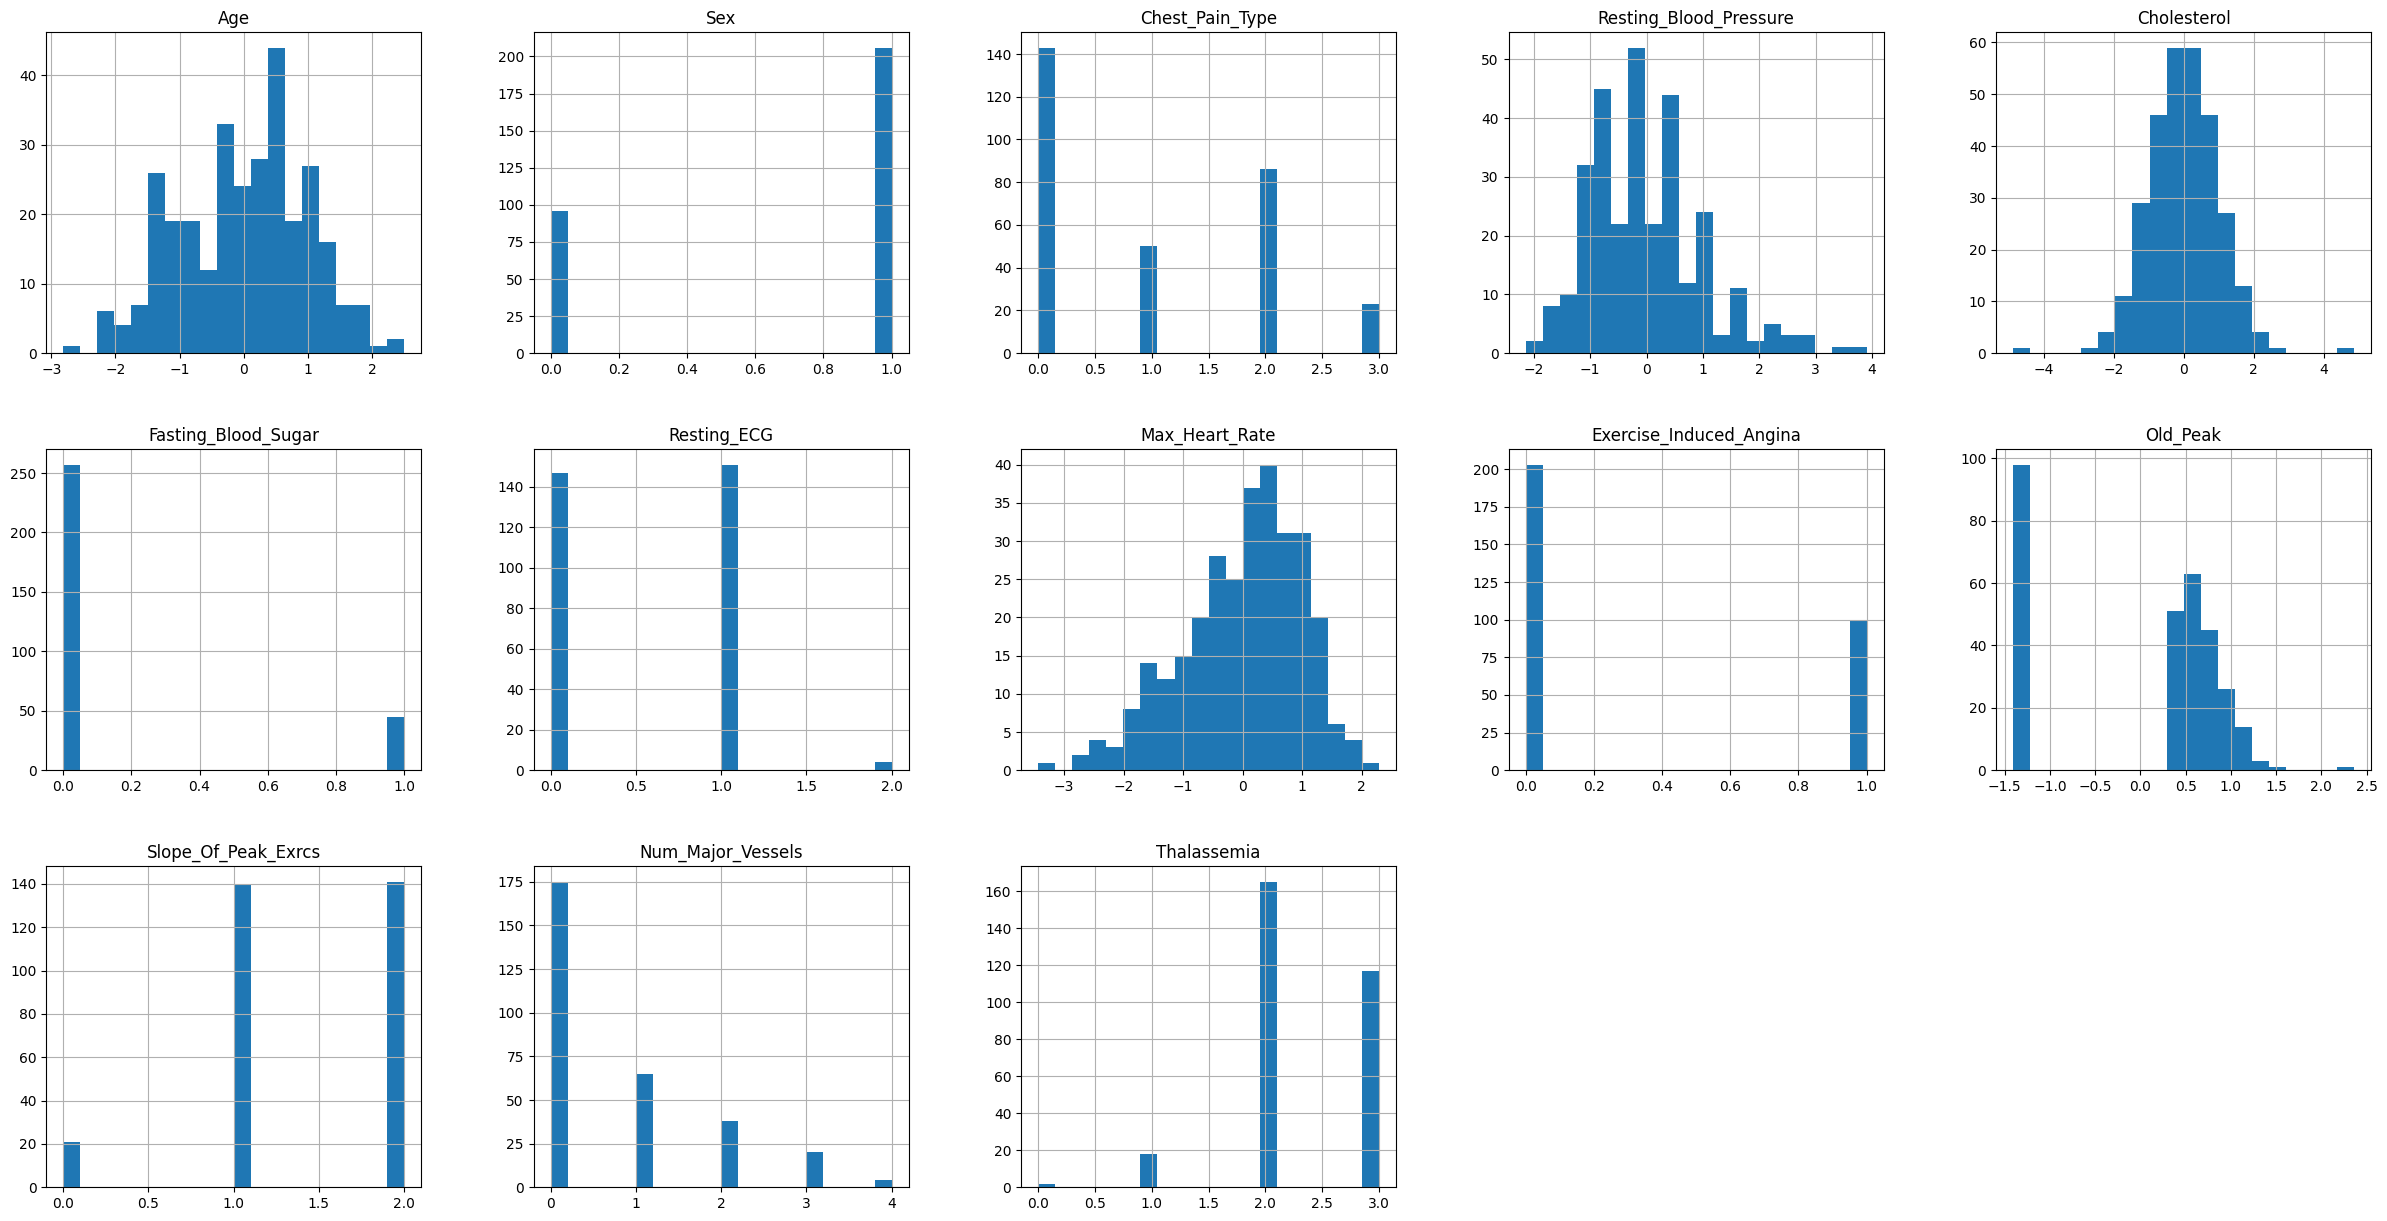

In [73]:
X.hist(figsize=(30,15), bins = 20, layout=(3,5));

Text(0.5, 1.0, 'Violin plot of features')

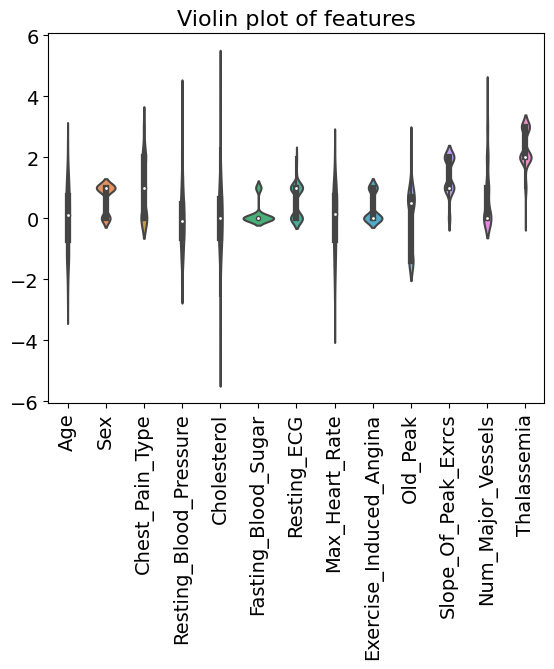

In [74]:
plt.rcParams['font.size'] = 14

f = sns.violinplot(data=X)

f.set_xticklabels(f.get_xticklabels(),
                  rotation=90)

plt.title("Violin plot of features",
          size=16)

### Check for data imbalance
- Doesn't need balancing

In [75]:
print(Y.value_counts())

Output
1         164
0         138
Name: count, dtype: int64


### PCA
- Seems to work better without

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
X_new = pca.fit_transform(X)

# plt.style.use('ggplot')
# colors = {1:'tab:blue', 0:'tab:orange'}
# fig, axes = plt.subplots(1,1)
# axes.scatter(X_new[:,0], X_new[:,1], c=Y['Output'].map(colors))
# axes.set_xlabel('PC1')
# axes.set_ylabel('PC2')
# axes.set_title('After PCA')
# plt.show()

### Model Training and testing

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=3, shuffle=True)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline

names = [
    "Logistic Regression",
    "SVC",
    "Random Forest",
    "Multi-Layer Perceptron",
    "GaussianNB",
    "XGB",
    "LightGBM",
    "CatBoost",
]

classifiers = [
    LogisticRegression(C= 0.15998587196060574, penalty= 'l1', solver= 'liblinear'),
    SVC(kernel="linear", C=0.025),
    RandomForestClassifier(n_estimators=25, max_depth=8, max_features="log2"),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(var_smoothing=0.0107),
    XGBClassifier(),
    LGBMClassifier(num_leaves=8 ),
    CatBoostClassifier(verbose=0, n_estimators=100, max_depth=7),
    #CatBoostClassifier(verbose=0, n_estimators=35, max_depth=6),
    
]

for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train.values.ravel())
        score = clf.score(X_test, y_test.values.ravel())
        print(name, ": ", score)
        if name == "CatBoost":
                print(clf.get_params())

Logistic Regression :  0.868421052631579
SVC :  0.868421052631579
Random Forest :  0.8947368421052632
Multi-Layer Perceptron :  0.8421052631578947
GaussianNB :  0.8552631578947368
XGB :  0.868421052631579
[LightGBM] [Info] Number of positive: 115, number of negative: 111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 226, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508850 -> initscore=0.035402
[LightGBM] [Info] Start training from score 0.035402
LightGBM :  0.8421052631578947
CatBoost :  0.9210526315789473
{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('catboostclassifier', <catboost.core.CatBoostClassifier object at 0x000001B769FE6D50>)], 'verbose': False, 'standardsc

### Tuning Hyperparams
- CatBoost performs best

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Using GridSearchCv
pipe = Pipeline([
    ("scl", StandardScaler()),
    ("Classifier", LogisticRegression())
])

# Define the parameter grid for LogisticRegression
param_grid = [
    {"Classifier": [LogisticRegression()],
     "Classifier__C": np.logspace(-3, 3, 50),
     "Classifier__penalty": ["l1", "l2"],
     "Classifier__solver": ["liblinear"]
    }
    ,
     {"Classifier": [SVC()], 
      "Classifier__C": np.logspace(-3, 3, 50),
      "Classifier__degree": np.arange(1,5),
      "Classifier__gamma": ["scale","auto"],
      "Classifier__decision_function_shape":["ovo", "ovr"]
     }
    ]

# Perform GridSearchCV with only Logistic Regression
g_search = GridSearchCV(pipe, param_grid=param_grid, scoring="f1", cv=10, n_jobs=-1)
g_search.fit(X_train, y_train)
print("Best Train Score: ", g_search.best_score_)
print("Best Params: ", g_search.best_params_)
print("Best Test Score : ",g_search.score(X_test, y_test))

Best Train Score:  0.821965367965368
Best Params:  {'Classifier': LogisticRegression(C=0.1206792640639329, penalty='l1', solver='liblinear'), 'Classifier__C': 0.1206792640639329, 'Classifier__penalty': 'l1', 'Classifier__solver': 'liblinear'}
Best Test Score :  0.9072164948453607


c:\Users\toyal\anaconda3\envs\DataScienceProjects\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Create the random grid
random_grid = {
                "max_depth": [3, 5,8,10,12], 
                'n_estimators': [25,35,50,70,75,100,125,150,175],
                "max_features": [3,"sqrt","log2"], 
                "min_samples_split": [2,3], 
                "bootstrap": [True, False], 
                "criterion": ["gini", "entropy","log_loss"],
                } 

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
print("Best Train Score: ", rf_random.best_score_)
print("Best Params: ", rf_random.best_params_)
print("Best Test Score : ",rf_random.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Train Score:  0.8406432748538012
Best Params:  {'n_estimators': 50, 'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
Best Test Score :  0.881578947368421


c:\Users\toyal\anaconda3\envs\DataScienceProjects\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [80]:

classifier = RandomForestClassifier()
params_RF = {
             'max_features': ["sqrt","log2"], # most important
             'n_estimators': [25,35,50,70,75,100,125,150,175] # most important
             }
gs_RF = GridSearchCV(estimator=classifier, 
                 param_grid=params_RF, 
                 #cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_RF.fit(X_train, y_train)
print("Best Train Score: ", gs_RF.best_score_)
print("Best Params: ", gs_RF.best_params_)
print("Best Test Score : ",gs_RF.score(X_test, y_test))


Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\toyal\anaconda3\envs\DataScienceProjects\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\toyal\anaconda3\envs\DataScienceProjects\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\toyal\anaconda3\envs\DataScienceProjects\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\toyal\anaconda3\envs\DataScienceProjects\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column

Best Train Score:  0.7964251207729468
Best Params:  {'max_features': 'sqrt', 'n_estimators': 75}
Best Test Score :  0.881578947368421


In [81]:
from sklearn.metrics import make_scorer, accuracy_score
clf = CatBoostClassifier()
params = {#'iterations': [500],
    
          #'depth': [4, 5, 6],
          'max_depth':[2,3,4,6,7,8,9],
          #'loss_function': ['Logloss', 'CrossEntropy'],
          'n_estimators': [25,35,50,75,100,125,150,500],
          #'l2_leaf_reg': np.logspace(-20, -19, 3),
          #'leaf_estimation_iterations': [10],

          'logging_level':['Silent'],
          'random_seed': [42]
         }
#(n_estimators=100, max_depth=7)
scorer = make_scorer(accuracy_score)
clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring=scorer, cv=5)
clf_grid.fit(X_train, y_train)
print("Best Train Score: ", clf_grid.best_score_)
print("Best Params: ", clf_grid.best_params_)
print("Best Test Score : ",clf_grid.score(X_test, y_test))

Best Train Score:  0.8230917874396135
Best Params:  {'logging_level': 'Silent', 'max_depth': 6, 'n_estimators': 35, 'random_seed': 42}
Best Test Score :  0.9078947368421053


### Visualising the final results

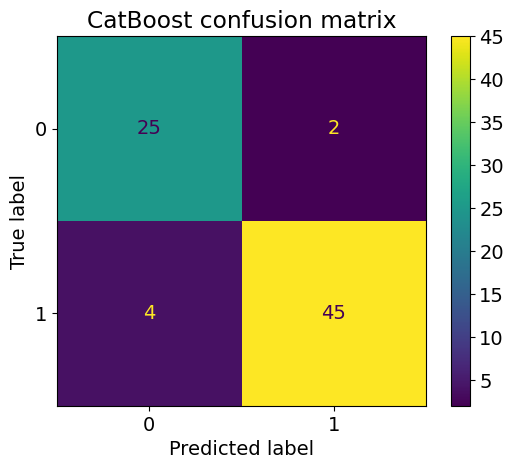

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf = CatBoostClassifier(verbose=0, n_estimators=100, max_depth=7)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.title(label='CatBoost confusion matrix')
plt.show()

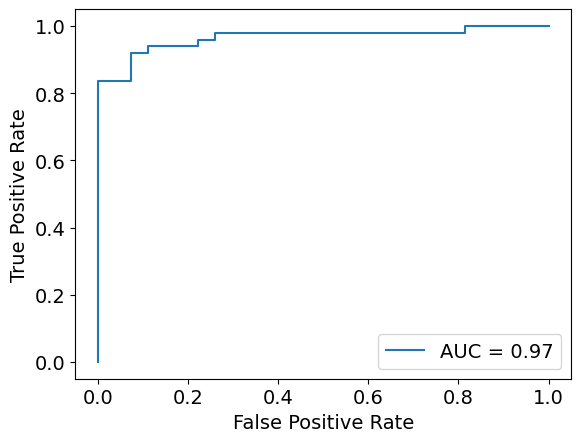

In [93]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
y_score = clf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_score)).plot()